feature selection
----
source: https://github.com/FIIT-IAU/IAU-course/blob/main/exercises/week-06/IAU_062_feature_selection.ipynb

In [1]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression, SelectFromModel
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import pandas as pd
import json

In [3]:
# depth of this filr in the project
file_depth = '../..'

with open(file_depth + '/config/data_1m_config.json') as config_file:
    config = json.load(config_file)

context_data_path = config['context_data']
context_data = pd.read_csv(file_depth + context_data_path)
context_data

,user_id,movie_id,day,is_weekday,season,part_of_day,holiday,user_gender,user_age,user_occupation,...,genre_film-noir,genre_forchildren,genre_horror,genre_musical,genre_mystery,genre_romance,genre_sci-fi,genre_thriller,genre_war,genre_western
0,1,1193,7,0,4,4,new_years,F,1,10,...,0,0,0,0,0,0,0,0,0,0
1,1,661,7,0,4,4,new_years,F,1,10,...,0,1,0,1,0,0,0,0,0,0
2,1,914,7,0,4,4,new_years,F,1,10,...,0,0,0,1,0,1,0,0,0,0
3,1,3408,7,0,4,4,new_years,F,1,10,...,0,0,0,0,0,0,0,0,0,0
4,1,2355,7,0,4,4,no_holiday,F,1,10,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,3,1,1,4,no_holiday,M,25,6,...,0,0,0,0,0,0,0,0,0,0
1000205,6040,1094,3,1,1,4,no_holiday,M,25,6,...,0,0,0,0,0,1,0,0,1,0
1000206,6040,562,3,1,1,4,no_holiday,M,25,6,...,0,0,0,0,0,0,0,0,0,0
1000207,6040,1096,3,1,1,4,no_holiday,M,25,6,...,0,0,0,0,0,0,0,0,0,0


Categorical data to numerical

In [4]:
# Label encode categorical columns
categorical_columns = ['holiday', 'user_gender']

for column in categorical_columns:
    context_data[column] = LabelEncoder().fit_transform(context_data[column])

context_data

,user_id,movie_id,day,is_weekday,season,part_of_day,holiday,user_gender,user_age,user_occupation,...,genre_film-noir,genre_forchildren,genre_horror,genre_musical,genre_mystery,genre_romance,genre_sci-fi,genre_thriller,genre_war,genre_western
0,1,1193,7,0,4,4,1,0,1,10,...,0,0,0,0,0,0,0,0,0,0
1,1,661,7,0,4,4,1,0,1,10,...,0,1,0,1,0,0,0,0,0,0
2,1,914,7,0,4,4,1,0,1,10,...,0,0,0,1,0,1,0,0,0,0
3,1,3408,7,0,4,4,1,0,1,10,...,0,0,0,0,0,0,0,0,0,0
4,1,2355,7,0,4,4,2,0,1,10,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,3,1,1,4,2,1,25,6,...,0,0,0,0,0,0,0,0,0,0
1000205,6040,1094,3,1,1,4,2,1,25,6,...,0,0,0,0,0,1,0,0,1,0
1000206,6040,562,3,1,1,4,2,1,25,6,...,0,0,0,0,0,0,0,0,0,0
1000207,6040,1096,3,1,1,4,2,1,25,6,...,0,0,0,0,0,0,0,0,0,0


In [5]:
target_data_path = config['target_data']
target_ratings = pd.read_csv(file_depth + target_data_path)
target_ratings

,rating_id,rating
0,0,5
1,1,3
2,2,3
3,3,4
4,4,5
...,...,...
1000204,1000204,1
1000205,1000205,5
1000206,1000206,5
1000207,1000207,4


-----------
Data scaling

In [6]:
X = StandardScaler().fit_transform(context_data) 
y = target_ratings['rating']

#### Feature selection using Mutual Information (MI)

* Mutual information between two random variables is a non-negative value, which measures the dependency between the variables.
* It is equal to zero if and only if two random variables are independent
* Higher values mean higher dependency.

movie_id             0.139486
user_id              0.120984
user_zip_code        0.083730
movie_year           0.017307
genre_drama          0.007709
genre_horror         0.004858
genre_film-noir      0.003806
genre_war            0.003580
user_occupation      0.003360
user_age             0.002351
day                  0.001471
genre_crime          0.001246
genre_sci-fi         0.001178
user_gender          0.001147
genre_romance        0.001121
genre_action         0.001101
genre_comedy         0.001014
holiday              0.000925
genre_animation      0.000385
season               0.000304
genre_thriller       0.000000
genre_adventure      0.000000
genre_documentary    0.000000
genre_fantasy        0.000000
genre_forchildren    0.000000
genre_musical        0.000000
part_of_day          0.000000
is_weekday           0.000000
genre_mystery        0.000000
genre_western        0.000000
dtype: float64


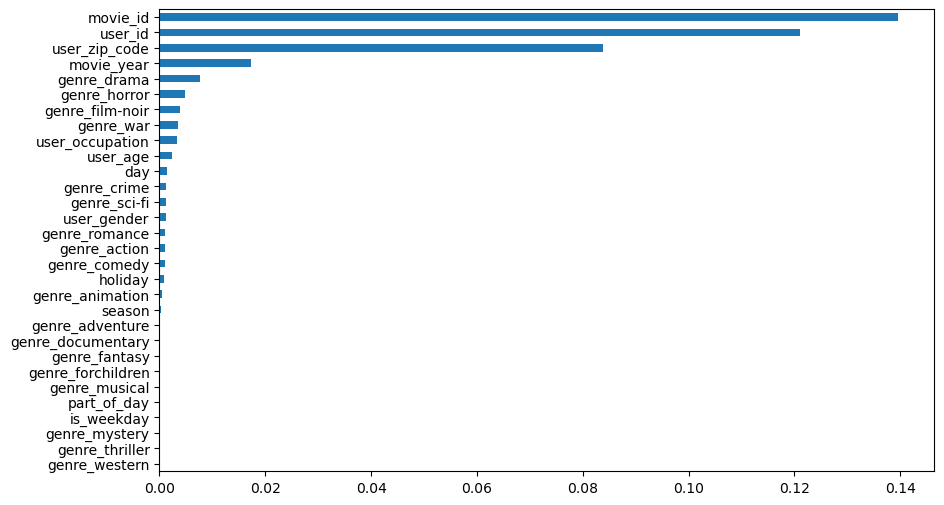

In [ ]:
mi_selector = SelectKBest(score_func=mutual_info_regression, k=len(context_data.columns))
mi_selector.fit_transform(X, y)

mi_scores = pd.Series(abs(mi_selector.scores_), index=context_data.columns).sort_values()
plt.figure(figsize=(10,6))
mi_scores.plot(kind='barh')
print(mi_scores.sort_values(ascending=False))

#### Feature selection using SelectFromModel

##### Model : Logistic Regression

In [7]:
lr_selector = SelectFromModel(estimator=LogisticRegression(max_iter=1000)).fit(X, y)
# print(lr_selector.estimator_.coef_)
# print(lr_selector.threshold_)
print(lr_selector.get_support())
lr_selector_list = lr_selector.get_support()

X_new_log_reg = lr_selector.transform(X)
print(X_new_log_reg.shape)
# X_new_lr

[False  True False False False False False False  True False False  True
 False False  True False False  True  True False  True  True  True False
 False False False  True  True False]
(1000209, 11)


##### Model : LinearSVC L1

In [28]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
l1_selector = SelectFromModel(estimator=lsvc, prefit=True)
print(l1_selector.get_support())
l1_selector_list = l1_selector.get_support()

X_new_l1 = l1_selector.transform(X)
print(X_new_l1.shape)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
(1000209, 30)


--------------

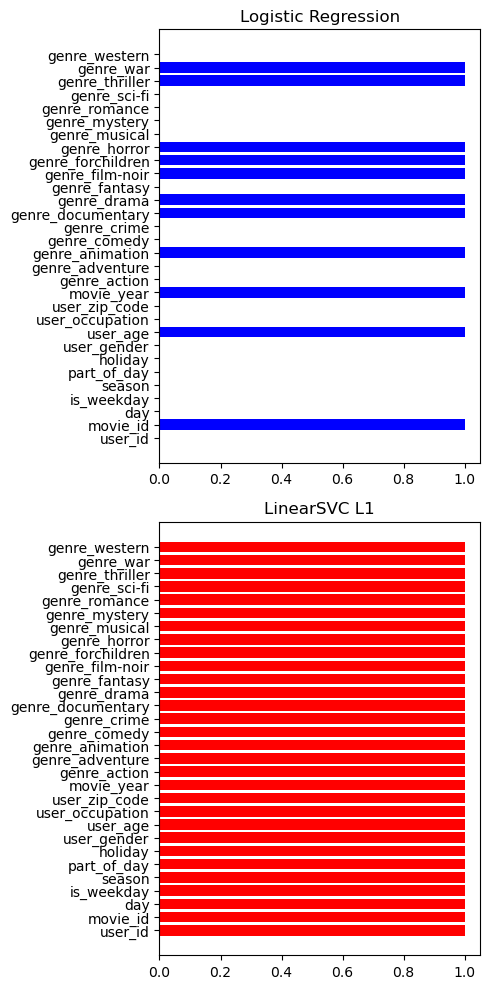

In [31]:
# Sample boolean arrays
array1 = lr_selector.get_support()
array2 = l1_selector.get_support()

# Sample string labels
labels = context_data.columns.values

# Plotting the boolean arrays
fig, ax = plt.subplots(2, 1, figsize=(5, 10))

# Plotting array1 horizontally
ax[0].barh(range(len(array1)), array1, color='blue')
ax[0].set_yticks(range(len(array1)))
ax[0].set_yticklabels(labels)
ax[0].set_title('Logistic Regression')

# Plotting array2 horizontally
ax[1].barh(range(len(array2)), array2, color='red')
ax[1].set_yticks(range(len(array2)))
ax[1].set_yticklabels(labels)
ax[1].set_title('LinearSVC L1')

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


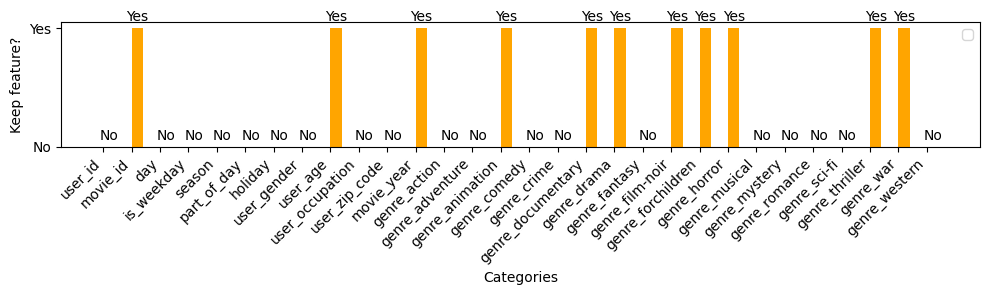

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


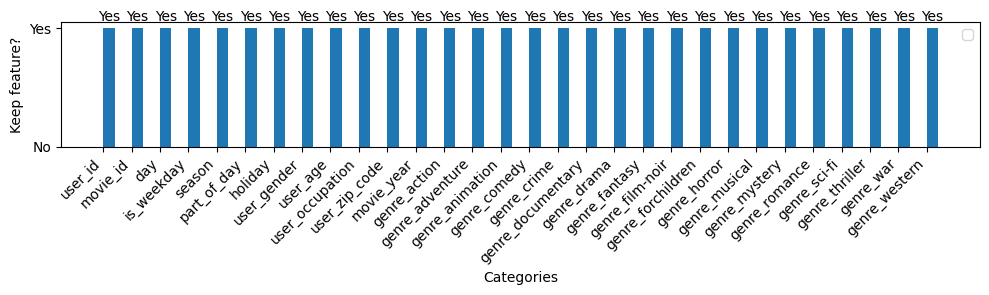

In [66]:
# Sample boolean arrays
array1 = lr_selector.get_support()
array2 = l1_selector.get_support()

# Sample string labels
labels = context_data.columns.values

import numpy as np

# Convert boolean values to string values ('Yes' for True, 'No' for False)
array1_labels = ['Yes' if val else 'No' for val in array1]
array2_labels = ['Yes' if val else 'No' for val in array2]

# Set the width of the bars
bar_width = 0.4

# Define positions for the bars
index = np.arange(len(labels))

# Create subplots and plot the arrays
fig, ax1 = plt.subplots(figsize=(10, 3))


rects1 = ax1.bar(index + bar_width/2, array1, bar_width, color='orange')


# Function to add labels on top of the bars
def autolabel(rects, array_labels, ax):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        ax.annotate('{}'.format(array_labels[i]),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels on top of the bars for both arrays
autolabel(rects1, array1_labels, ax1)

# Set labels, title, and legend
ax1.set_xlabel('Categories')
ax1.set_ylabel('Keep feature?')
ax1.set_xticks(index)
ax1.set_xticklabels(labels, rotation=45, ha='right')  # Rotating x-labels by 45 degrees
ax1.set_yticks([0, 1])  # Setting y-axis ticks
ax1.set_yticklabels(['No', 'Yes'])  # Setting custom y-axis tick labels
ax1.legend()

plt.tight_layout()
plt.show()

# -------------------------------------------

fig, ax2 = plt.subplots(figsize=(10, 3))
rects2 = ax2.bar(index + bar_width/2, array2, bar_width)


# Add labels on top of the bars for both arrays
autolabel(rects2, array2_labels, ax2)

# Set labels, title, and legend
ax2.set_xlabel('Categories')
ax2.set_ylabel('Keep feature?')
ax2.set_xticks(index)
ax2.set_xticklabels(labels, rotation=45, ha='right')  # Rotating x-labels by 45 degrees
ax2.set_yticks([0, 1])  # Setting y-axis ticks
ax2.set_yticklabels(['No', 'Yes'])  # Setting custom y-axis tick labels
ax2.legend()

plt.tight_layout()
plt.show()

---------------

In [9]:
mi_selected_keys = mi_scores[mi_scores != 0].index.tolist()

lr_selected_keys = []
for key, selected in zip(context_data.keys(), lr_selector_list):
    if selected:
        lr_selected_keys.append(key)

l1_selected_keys = []
for key, selected in zip(context_data.keys(), l1_selector_list):
    if selected:
        l1_selected_keys.append(key)

print('Number of features selected using Mutual Information: ', len(mi_selected_keys))
print(mi_selected_keys)

print()

print('Number of features selected using Logistic Regression: ', len(lr_selected_keys))
print(lr_selected_keys)

print()

print('Number of features selected using L1: ', len(l1_selected_keys))
print(l1_selected_keys)

Number of features selected using Mutual Information:  20
['season', 'genre_animation', 'holiday', 'genre_comedy', 'genre_action', 'genre_romance', 'user_gender', 'genre_sci-fi', 'genre_crime', 'day', 'user_age', 'user_occupation', 'genre_war', 'genre_film-noir', 'genre_horror', 'genre_drama', 'movie_year', 'user_zip_code', 'user_id', 'movie_id']

Number of features selected using Logistic Regression:  11
['movie_id', 'user_age', 'movie_year', 'genre_animation', 'genre_documentary', 'genre_drama', 'genre_film-noir', 'genre_forchildren', 'genre_horror', 'genre_thriller', 'genre_war']

Number of features selected using L1:  30
['user_id', 'movie_id', 'day', 'is_weekday', 'season', 'part_of_day', 'holiday', 'user_gender', 'user_age', 'user_occupation', 'user_zip_code', 'movie_year', 'genre_action', 'genre_adventure', 'genre_animation', 'genre_comedy', 'genre_crime', 'genre_documentary', 'genre_drama', 'genre_fantasy', 'genre_film-noir', 'genre_forchildren', 'genre_horror', 'genre_musical'

Saving the selected features to files

In [10]:
with open('feature_selections_results/lr_selected_features.txt', 'w') as file:
    for item in lr_selected_keys:
        file.write(str(item) + '\n')

with open('feature_selections_results/l1_selected_features.txt', 'w') as file:
    for item in l1_selected_keys:
        file.write(str(item) + '\n')

with open('feature_selections_results/mi_selected_features.txt', 'w') as file:
    for item in mi_selected_keys:
        file.write(str(item) + '\n')